In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Graded homework 2

This graded homework has two exercises. The aim of the exercices is to test the following:
- Python skills (variables, lists, functions, conditions, loops)
- Numpy skills (array manipulation, random number generators, ...)
- Plotting skills using matplotlib (plotting, histograms, labelling, ...)
- Using external sources to find the functions you need
- Theoretical comprehension of the notion of:
    1. Sampling with Markov Chain Monte Carlo.
    2. Entropic forces

Each question is given in a markdown cell and should be answered in the cell/cells below (you can add cells if needed). The figures must be generated and shown directly in this notebook. If a questions demands that you write an answer, use a 'markdown' cell, which can include latex between \\$ symbols. As an example,
\\$\vec{F}=m\vec{a}\\$
gives $\vec{F}=m\vec{a}$.

Your code should run properly if you do the following: 1) restart the kernel 2) execute all cells in order from top to bottom. Running all cells should take a reasonable time on a standard computer (<10 min.).

All the sources you consult should be explicitly cited, except the numpy and matplotlib official documentation, the lecture notes and the previous exercises. You are encouraged to use external sources, since every function needed in this exercise has not necessarily been seen in the previous exercises. Please also cite every person you discussed this exercise with.

# Exercise 1: Markov chain on a chessboard

In this exercise, you will implement a Markov chain simulation on a chessboard with a king as the only piece. The king prefers moving to black squares over white squares. You will compute the stationary distribution of the position of the king by using MCMC and by using the transition matrix. The king moves according to the following set of rules:

- The king **must** move to one of the valid neighboring squares (up, down, left, right, diagonals) at each move.
- The king **cannot** move outside of the board.
- The probability of moving to a black square is twice that of moving to a white square.

Below are two examples of the king's possible moves with the transition probabilities.

![title](chessboard_1.png)
![title](chessboard_2.png)


**1.1** Create a function taking as input the position of the king as an array of size 2 and returns the position of the king after one move following the process described above. The first element of the position should be the column (0 for A, 1 for B, and so one) and the second element the line (0 for line 1, 1 for line 2, and so one). You may use python loops. In your code, do **not** compute the full transition matrix.

In [60]:
# Your code here:

In [61]:
# Solution:

rng = np.random.default_rng(123) #optional: use a random number generator

def is_black_square(row, col):
    """Check if the square is black on the chessboard."""
    return (row + col) % 2 == 1

def get_neighbors(row, col):
    """Get valid neighbors for the king."""
    neighbors = []
    for dr, dc in [[-1, -1], [-1, 0], [-1, 1], 
                   [0, -1],         [0, 1], 
                   [1, -1], [1, 0], [1, 1]]:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 8 and 0 <= new_col < 8:
            neighbors.append([new_row, new_col])
    return neighbors

def get_probabilities(neighbors):
    """Assign probabilities to neighboring squares."""
    total_weight = sum(2 if is_black_square(r, c) else 1 for (r, c) in neighbors)
    probabilities = [
        (2 if is_black_square(r, c) else 1) / total_weight for (r, c) in neighbors
    ]
    return probabilities

def move(position):
    """Get the next possible positions for the king."""
    row, col = position
    neigh=get_neighbors(row, col)
    prob=get_probabilities(neigh)
    next_pos_index=rng.choice(len(neigh), 1, p=prob)
    next_position = neigh[next_pos_index[0]]
    return next_position

**1.2** Estimate the probability to be on each square after 2 moves starting from position A1. To do this, run 10000 simulations using your code from **1.1**. You can use python loops. Print the estimated probability to be in A1, B1 and C3 after 2 moves.

In [62]:
num_chains=10000
final_positions=np.zeros((num_chains,2))
for exp in range(num_chains):
    position = np.array([0, 0])
    for _ in range(2):
        position = move(position)
    final_positions[exp]=position
unique_position, number_ending_in_unique_position=np.unique(final_positions, return_counts= True, axis=0)
print('Estimated probability to be in A1 after 2 moves : ', number_ending_in_unique_position[np.all(unique_position==[0,0], axis=1)]/num_chains)
print('Estimated probability to be in B1 after 2 moves : ', number_ending_in_unique_position[np.all(unique_position==[2,1], axis=1)]/num_chains)
print('Estimated probability to be in C3 after 2 moves : ', number_ending_in_unique_position[np.all(unique_position==[2,2], axis=1)]/num_chains)


Estimated probability to be in A1 after 2 moves :  [0.1298]
Estimated probability to be in B1 after 2 moves :  [0.1474]
Estimated probability to be in C3 after 2 moves :  [0.0154]


**1.3** Create the transition matrix $T$. It should be a $64\times 64$ numpy array, where the index go over all possible squares of the chessboard in the following order: A1, A2, ..., A8, B1, B2, ..., B8, C1, ..., H1, H2, ..., H8. The element $T_{i,j}$ indicates the probability to go from square $j$ to square $i$. You may use python loops. Print the sum of each column of the matrix you obtain.

In [63]:
# Your code here

In [64]:
# Solution:
def is_black_square(row, col):
    """Check if the square is black on the chessboard."""
    return (row + col) % 2 == 1

def get_neighbors(row, col):
    """
    Get all valid neighboring squares for the king at position (row, col).
    """
    neighbors = []
    for dr, dc in [(-1, -1), (-1, 0), (-1, 1), 
                   (0, -1),         (0, 1), 
                   (1, -1), (1, 0), (1, 1)]:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 8 and 0 <= new_col < 8:  # Stay within board boundaries
            neighbors.append((new_row, new_col))
    return neighbors

def generate_transition_matrix():
    """
    Generate the 64x64 transition matrix for the king's moves on a chessboard.
    The king has twice the probability of moving to black squares compared to white squares.
    """
    transition_matrix = np.zeros((64, 64))

    for row in range(8):
        for col in range(8):
            current_index = row * 8 + col  # Flatten (row, col) into a single index
            neighbors = get_neighbors(row, col)
            
            # Calculate the weights (2 for black squares, 1 for white squares)
            total_weight = sum(2 if is_black_square(r, c) else 1 for r, c in neighbors)
            
            for neighbor_row, neighbor_col in neighbors:
                neighbor_index = neighbor_row * 8 + neighbor_col
                weight = 2 if is_black_square(neighbor_row, neighbor_col) else 1
                transition_matrix[neighbor_index, current_index] = weight / total_weight

    return transition_matrix
T=generate_transition_matrix()
print('column sum of the transition matrix : ', np.sum(T, axis=0))

column sum of the transition matrix :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**1.4** Suppose the king starts in A1. Print the probability to be on each square after 2 moves (it should be an array of size $64\times 1$ containing the probability to be on each square following the same ordering as above). The output of your print may be truncated. To do the calculation, use the transition matrix you created in **1.3**, and do not use python loops. Your code should fit in a few lines.

In [65]:
pos_init=np.zeros((64,1))
pos_init[0,0]=1
print(np.linalg.matrix_power(T, 2) @ pos_init)

[[0.13095238]
 [0.14761905]
 [0.07380952]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.14761905]
 [0.11428571]
 [0.14761905]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07380952]
 [0.14761905]
 [0.01666667]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


**1.5** Obtain the stationary distribution of the Markov chain by computing the eigenvector associated to the eigenvalue 1 of the transition matrix. Normalize the eigenvector as needed for it to be a probability distribution. Visualize the distribution using the code given below.

In [66]:
def visualize_distribution(stationary_dist):
    """
    Visualize the stationary distribution as a heatmap on the chessboard. The input is an array of size 64x1.
    """
    stationary_dist.reshape((8, 8))
    print(stationary_dist.reshape(8,8).shape)
    plt.figure(figsize=(8, 8))
    plt.imshow(stationary_dist.reshape((8,8)).T, cmap='gray_r', interpolation= "nearest", alpha=0.5,origin='upper')
    plt.colorbar(label="Probability")
    plt.title("Stationary Distribution on Chessboard")
    plt.xticks(range(8), [chr(i) for i in range(65, 73)])
    plt.yticks(range(8), range(1, 9))
    plt.gca()
    plt.show()

In [67]:
# Your code here

Eigenvalues :  [ 1.          0.85722679  0.92694024  0.92693671  0.72273642  0.66479189
  0.72356811  0.50988307  0.66476531  0.43282161  0.38838978  0.43253252
  0.39141614  0.28756638 -0.59257984 -0.65192376  0.28744181 -0.58604508
 -0.47382584  0.14053553 -0.51777619  0.12298855 -0.40570087 -0.45994044
  0.09755028  0.12366817  0.04696492  0.0968853  -0.34509115 -0.38923613
 -0.31819368 -0.3097615   0.04859663 -0.01379732 -0.33652433 -0.02619666
 -0.28722798 -0.25958367 -0.22911712 -0.22818065 -0.21769225 -0.20918028
 -0.25967016 -0.25545137 -0.19020351 -0.02980798 -0.22315526 -0.08843194
 -0.06435911 -0.09756323 -0.1002175  -0.06439187 -0.20447389 -0.17851332
 -0.15800026 -0.11654813 -0.13293342 -0.12508445 -0.12903131 -0.1203601
 -0.130451   -0.12761385 -0.12010537 -0.12026436]
(8, 8)


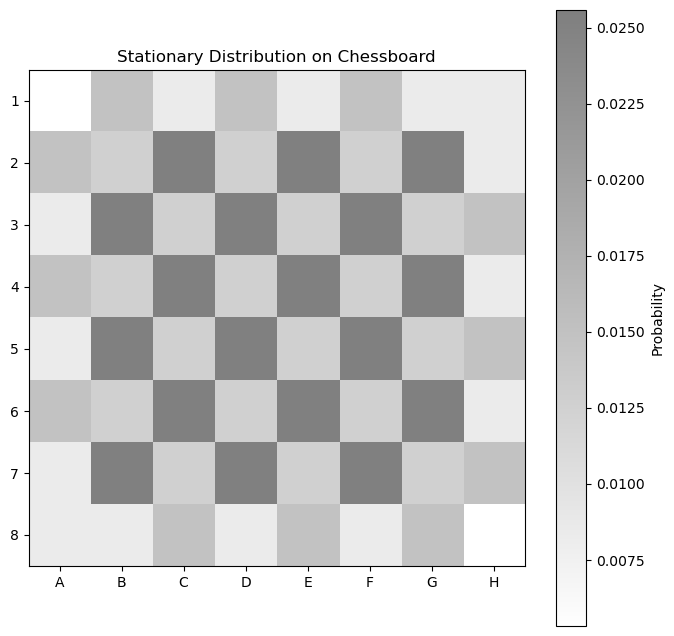

In [68]:
# Solution:
eigval, eigvec=np.linalg.eig(T) 
print('Eigenvalues : ', eigval) # In this case the eigenvector of value 1 has index 0
visualize_distribution(eigvec[:,0]/np.sum(eigvec[:,0]))

**1.6** Compute and print the convergence time $\tau=-1/\text{log}(\lambda_2)$, where $\lambda_2$ is the second largest eigenvalue.

In [69]:
# Your code here

In [70]:
# Solution:
tau=-1/np.log(np.sort(eigval)[-2])
print('Tau : ', tau)

Tau :  13.18110419925233


**1.7** As seen in the lecture, we can estimate that after $3\tau$ moves the position of the king should be close to being sampled from the stationary distribution. Run $50000$ simulations of $3\tau$ moves (rounded to the nearest integer) and, at each move, compute the estimated distribution over the possible positions. The inital position of the king should be taken uniformly over all the possible positions independently for each simulation. You may use python loops.

 Plot the euclidian norm of the difference between the estimated distribution and the stationary distribution obtained in **1.5** as a function of the number of moves. The euclidian norm of the difference is $\sqrt{\sum_{i}(\pi_i^{st}-\pi_i^t)^2}$, where $\pi_i^{st}$ is the probability to be on square $i$ for the stationary distribution, $\pi_i^t$ the estimated probability with the simulations to be on square $i$ after $t$ steps, and the sum is over all possible positions of the chessboard. Also plot a horizontal line at height given by the euclidian norm of the difference between the estimated distribution from $50000$ samples taken from the true stationary distribution and the stationary distribution itself. For this, do not use a python loop. Hint: use `np.random.choice`.
 
  From this plot, estimate visually after how many moves the distribution stabilizes. Compare to the convergence time $\tau$ computed in **1.6**. Do you need to go through each squares of the chessboard at least once to sample from the stationary distribution ?

In [71]:
# Your code here:

Your answer here:

In [72]:
# Solution:
num_chains=50000
final_positions=np.zeros((num_chains,2))
diff=np.zeros((num_chains))
position = np.array([rng.integers(0,8, size=num_chains), rng.integers(0,8, size=num_chains)]).T # Uniform initial distribution
#position = np.array([rng.integers(0,1, size=num_chains), rng.integers(0,1, size=num_chains)]).T # All moves start on A1
T=int(3*tau)
diff=np.zeros((T))
t13=None
for t in range(T):
    for exp in range(num_chains):
        position[exp] = move(position[exp])
    position_index=8*position[:,0]+position[:,1] # Transform the position to a single index
    unique_position, number_ending_in_unique_position=np.unique(position_index, return_counts= True, axis=0)
    MCMC_distribution=np.zeros((64))
    MCMC_distribution[unique_position]=number_ending_in_unique_position/num_chains
    diff[t]=np.linalg.norm(MCMC_distribution-eigvec[:,0]/np.sum(eigvec[:,0]))


In [73]:
samples_from_stationary=rng.choice(np.arange(0, 64), size=num_chains, p=eigvec[:,0]/np.sum(eigvec[:,0]))
unique_, number_ending_in_unique_=np.unique(samples_from_stationary, return_counts= True, axis=0)
sample_from_stationary=np.zeros((64))
sample_from_stationary[unique_]=number_ending_in_unique_/num_chains
diff_sample_stationary=np.linalg.norm(sample_from_stationary-eigvec[:,0]/np.sum(eigvec[:,0]))

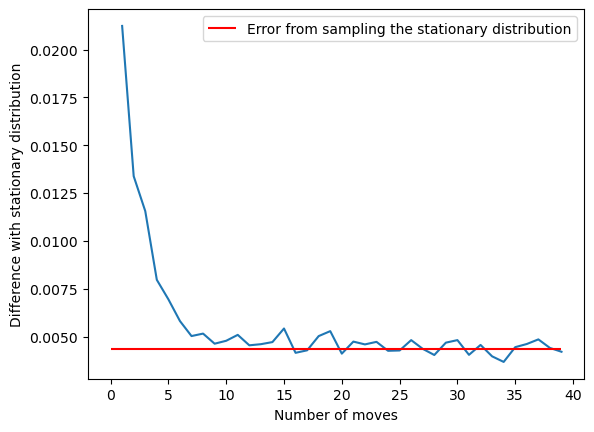

In [74]:
plt.plot(np.arange(1, T+1), diff)
position = np.array([rng.integers(0,8, size=num_chains), rng.integers(0,8, size=num_chains)]).T # Uniform initial distribution
MCMC_distribution=np.zeros((64))
MCMC_distribution[unique_position]=number_ending_in_unique_position/num_chains
plt.hlines(diff_sample_stationary, 0, T, color='red', label='Error from sampling the stationary distribution')
plt.legend()
plt.xlabel('Number of moves')
plt.ylabel('Difference with stationary distribution')
plt.savefig('error.png')

From the figure above, the distribution seems to stabilize between ~10-15 moves, which is in accordance wih the estimated $\tau\approx 13$ moves. 

No, we do not need to go through all possible squares before we sample from the stationary distribution. Indeed, only 10-15 moves (which is smaller than the 63 minimal moves to go through the chessboard) are enough before a good approximation of the stationary distribution is reached (under the assumption of a uniform start).

## Exercise 2: Sampling hard spheres in 1 dimension

In this exercise, we want to sample from the uniform distribution of $K$ hard spheres on the 1-dimensional interval $[0,L]$. Calling the spheres "hard" means that they cannot overlap in the range of their radius $R$ with other spheres or the border. The position of the center of the sphere $i$ is named $x_i\in \mathbb{R}$. This is illustrated in the figure below for $K=2$ spheres, where the first configuration is a valid configuration, and the second and third examples are invalid configurations (in the 2nd a sphere overlaps the border, and in the third the 2 spheres overlap).

Sampling uniformly means that, for the allowed position $x_1, x_2, ..., x_K$, the joint probability density $\rho(x_1, x_2, ..., x_K)=c$ is a constant, and is $0$ for the positions that are not allowed.

![title](hard_spheres.png)

![](hard-spheres.png)

**2.1** Write the mathematical condition such that the spheres do not overlap the border.

Your answer here

Solution:

$$x_i-R \geq 0 \,\forall i=1, ..., K$$
and
$$L-x_i-R \geq 0 \,\forall i=1, ..., K$$

Alternatively,
$$
R\leq x_i \leq L-R \,\forall i=1, ..., K
$$


**2.2** Write the mathematical condition such that each sphere does not overlap with other spheres.

Your answer here

Solution:
$$|x_i-x_j|\geq 2R\, \forall i=1, ..., K, j=1, ..., K, i\neq j $$

We will now consider the case with $K=2$ spheres.

**2.3** Write a function that takes as input a position of the sphere $x$, the radius of the sphere $R$ and the length of the interval $L$ and returns true if the sphere does **not** overlap with the border, and false in other cases.

In [75]:
# Your code here

In [76]:
# Solution:
def in_interval(x1, R, L):
    return x1-R>=0 and L-x1-R>=0
    # Alternative version:
    return R <= x1 <= L - R

**2.4** Write a function that takes as input two position of the spheres $x_1$, $x_2$ and the radius of the sphere $R$ and returns true if the spheres do **not** overlap, and false in other cases.

In [77]:
# Your code here

In [78]:
# Solution:
def valid_pair(x1, x2, R):
    return np.abs(x1-x2)>=2*R

**2.5** We consider the following sampling algorithm (algorithm A):
1. Sample $x_1$ from the uniform distribution of positions that do not overlap with the border.
2. Sample $x_2$ uniformly from the positions that do not overlap with the border and with the first sphere.
3. Return $x_1$ and $x_2$

Code a function that samples $N$ positions using algorithm A. Your function should take as input the number of desired samples $N$, the length of the interval $L$ and the radius of the spheres $R$. The output should be a numpy array of shape (N,2). You will not be penalized by the use of python loops.


In [79]:
# Your code here

In [80]:
# Optional : use a random number generator
rng = np.random.default_rng(123)

In [81]:
# Solution
def algorithm_A(N, L, R):
    samples=np.zeros((N,2))
    for i in range(N):
        x1=rng.uniform(R,L-R) # Alternatively use function from 1.3
        x2=rng.uniform(R, L-R)
        while not valid_pair(x1, x2, R): # Alternative (more efficient) solutions exist by sampling directly from the uniform space which does not overlap with the first sphere
            x2=rng.uniform(R, L-R)
        samples[i]=np.array([x1, x2])
    return samples

**2.6** Consider an alternative sampling algorithm (algorithm B):
1. Generate $x_1$ and $x_2$ from the uniform distribution of positions that do not overlap with the border.
2. If the two sphere with position $x_1$ and $x_2$ do not overlap, return $x_1$ and $x_2$. Otherwise, start again from step 1.

Code a function that samples $N$ positions using algorithm B. Your function should take as input the number of desired samples $N$, the length of the interval $L$ and the radius of the spheres $R$. The output should be a numpy array of shape (N,2). You will not be penalized by the use of python loops.


In [82]:
# Your solution here

In [83]:
# Solution
def algorithm_B(N, L, R):
    samples=np.zeros((N,2))
    for i in range(N):
        x1=rng.uniform(R,L-R) # Alternatively use function from 1.3
        x2=rng.uniform(R, L-R)
        while not valid_pair(x1, x2, R):
            x1=rng.uniform(R,L-R)
            x2=rng.uniform(R,L-R)
        samples[i]=np.array([x1, x2])
    return samples

**2.7** Sample $N=10^6$ positions using algorithm A and B with parameters $L=1$ and $R=0.1$. Plot a 2D histogram to visualize the estimated joint density $\rho(x_1, x_2)$. The position $x_1$ should be on the x-axis, the position $x_2$ on the y-axis, and the color should indicate the density. The plotted range of $x_1$ and $x_2$ should be $[0,L]$. You should have one figure for algorithm A and one figure for algorithm B. Regroup these two figures in one figure (for example using `plt.subplot`), choose an appropriate number of bins for the histogram, and label the figures appropriatly.

In [84]:
# Your solution here

In [85]:
# Solution
# Sample the points with both methods:
N=10**6
L=1
R=0.1
samples_A=algorithm_A(N, L, R)
samples_B=algorithm_B(N, L, R)

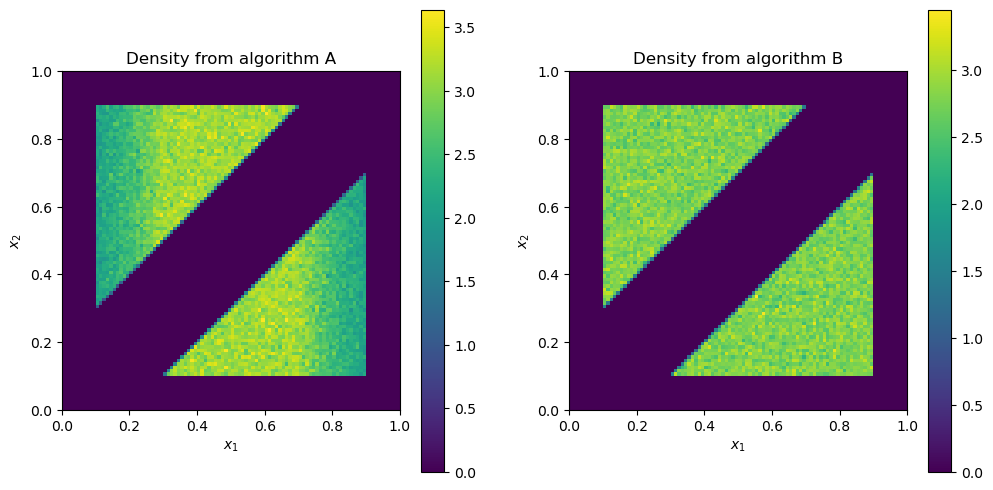

In [86]:
# Solution
# Plotting:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist2d(samples_A[:, 0], samples_A[:, 1], bins=100, range=[[0, L],[0,L]], cmap='viridis', density=True)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Density from algorithm A')
plt.colorbar()
plt.axis('scaled')

plt.subplot(1, 2, 2)

plt.hist2d(samples_B[:, 0], samples_B[:, 1], bins=100, range=[[0, L],[0,L]], cmap='viridis', density=True)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Density from algorithm B')
plt.colorbar()
plt.axis('scaled')

plt.show()


**2.8** Based on your figure from **1.7**, does algorithm A generate uniform samples (i.e. each of the allowed pairs $(x_1, x_2)$ is equiprobable) ? Does algorithm B generate uniform samples ? Justify briefly. 

Your answer here:

Solution:

Algorithm A does not produce uniform samples. Indeed, the figure shows a gradient of colors, which means that the density is not the same on the allowed region. On the other hand, algorithm B seems to produce uniform samples: the color (and thus the density) is approximately the same in the allowed region.

**2.9** Plot, on the same figure, a 1D histogram of the estimated marginal probability densities $\rho(x_1)$ of $x_1$ and $\rho(x_2)$ of $x_2$. The density of $x_1$ should be blue and the density of $x_2$ red. Do this for the samples obtained for algorithm A and algorithm B, and plot both figures side by side (again, for this you can use `subplot`). Label the figures appropriatly.

In [87]:
# Your solution here

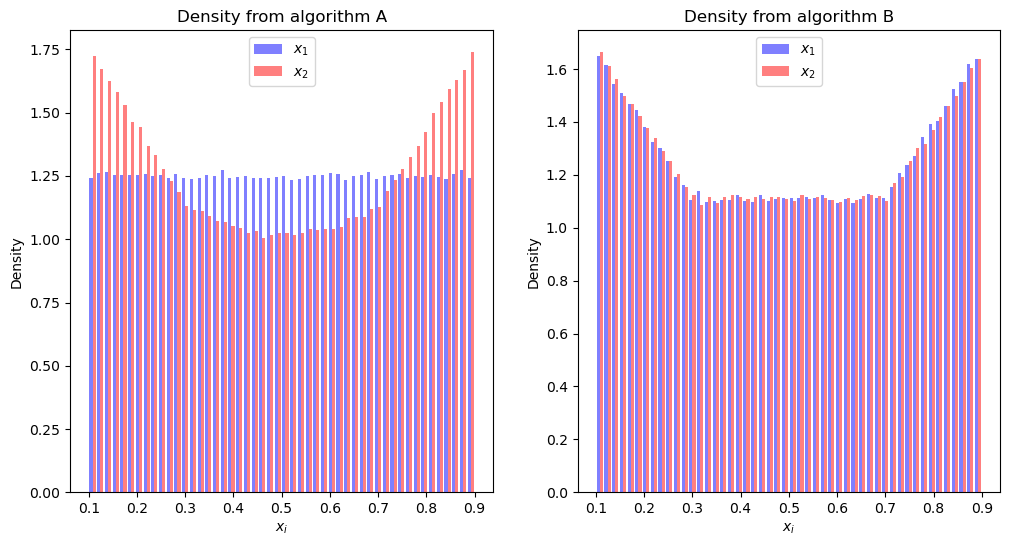

In [88]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_A, bins=50, color=['blue', 'red'], alpha=0.5, density=True, label=[r'$x_1$', r'$x_2$'])
plt.xlabel(r'$x_i$')
plt.ylabel('Density')
plt.legend()
plt.title('Density from algorithm A')

plt.subplot(1, 2, 2)
plt.hist(samples_B, bins=50, color=['blue', 'red'], alpha=0.5, density=True, label=[r'$x_1$', r'$x_2$'])
plt.xlabel(r'$x_i$')
plt.ylabel('Density')
plt.legend()
plt.title('Density from algorithm B')


plt.show()

**2.10** Based on the previous figure, are the marginal densities $\rho(x_1)$ and $\rho(x_2)$ uniform ? Answer for both the case of algorithm A and B.

Your answer here:

Solution:

For algorithm A, the density $\rho(x_1)$ is uniform while the $\rho(x_2)$ is not. (Not needed: This is expected as in algorithm A one first samples $x_1$ uniformly, and then $x_2$ will depend on $x_1$). For algorithm $B$, both $x_1$ and $x_2$ are not sampled uniformly. 

Additional note: the figure on the right shows that even thought the joint distribution $\rho(x_1, x_2)$ is uniform, the marginal distribution $\rho(x_1)$ is not. The spheres have more probability to be in the borders. This can be interpreted as an effective attractive force to the border, which appears only from entropic considerations. A intuitive explanation of this is the following: when a sphere touches the border ($x_1=R$), then the other sphere can have its position $x_2\in[3R, L-R]$. On the other hand, when a sphere is not near the border, then the other sphere can have its position $x_2\in[R, x_1-2R]\cup [x_1+2R, L-R]$. In the first case, the second sphere has an available interval of length $L-4R$, whereas in the second case the available interval is of length $L-6R$. Thus, there are more configurations where a sphere is in the border, and when sampling uniformly over all the pairs of configurations, the probability of one sphere being in the border will be higher. The computation of the marginal is presented at the end of lecture 13.

We will now consider the general case with K spheres.

**2.11** Consider the following algorithm (algorithm C):
1. Sample $y_i$ uniformly from the interval $[0, L-2KR]$ for $i=1, ..., K$
2. Order the $y_i$ in ascending order. We denote the ordering of the $y_i$ as $y_1'\leq y_2'\leq...\leq y_K'$.
3. Return $x_i=y_i'+(2i-1)R$ for $i=1,...,K$


Implement algorithm C, which should return a $N\times K$ numpy array containing $N$ samples.

In [89]:
# Your answer here

In [90]:
# Solution:
def algorithm_C(N, K, L, R):
    y=rng.uniform(0, L-2*K*R, size=(N,K))
    y_prime=np.sort(y, axis=1)
    return y_prime+(2*np.arange(1, K+1)-1)*R

**2.12** Is algorithm C more efficient than algorithm B ? Briefly justify. Only a qualitative justification is needed.

Your answer here:

Solution:

Yes, algorithm C is more efficient. This is because it does not reject samples, whereas algorithm B does. This is particularly noticebable when there are many spheres, the spheres are large and/or the interval is small. In that case sampling uniformly until the spheres do not overlap can take a long time.

**1.13** Consider $K=2$. Sample $N=10^6$ pairs of positions. Plot the histogram for the estimated marginal probability $\rho(x)$. Label it appropriatly. Is your figure closer to the histogram of algorithm A or B ? 

Important note: algorithm C as described returns the _ordered_ positions of the spheres. Thus, either:
- Swap $x_1$ and $x_2$ with 50% probability for each sample and plot your estimation of $\rho(x_1)$ and $\rho(x_2)$ as done in **1.9**
- OR plot the estimation of $\rho(x)$, where you use the obtained $x_1$ as well as $x_2$ to estimate $\rho(x)$. Hint: in this case flatten the result.

In [91]:
# Your answer here

Your answer here

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


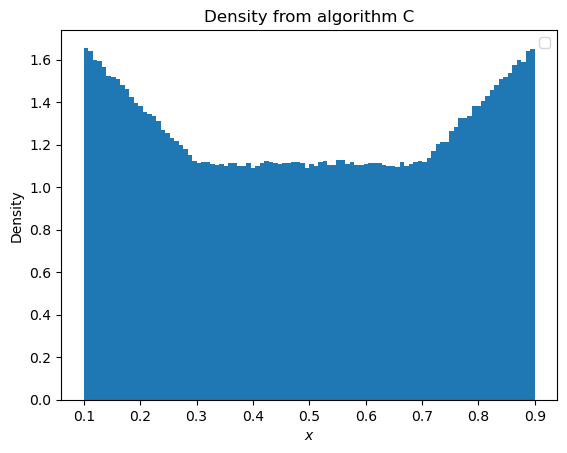

In [92]:
samples_C=algorithm_C(N, 2, L, R).flatten()
#plt.hist(samples_C, bins=50, color=['blue', 'red'], alpha=0.5, density=True, label=[r'$x_1$', r'$x_2$'])
plt.hist(samples_C, bins=100, density=True)
plt.xlabel(r'$x$')
plt.ylabel('Density')
plt.legend()
plt.title('Density from algorithm C')

plt.show()

The obtained figure is closer to the results from algorithm B (as expect as algorithm B samples uniformly).

**2.14** Consider the case $K=15$, $L=2$, $R=0.05$ and $N=10^7$. Plot a histogram of the estimated marginal probability density $\rho(x)$ obtained with algorithm C. Label it appropriatly. 

Note: similarly to above, the output of algorithm C are the _ordered_ positions. As the spheres are the same, use all the sampled position to plot the density.

In [93]:
# Your answer here:

In [94]:
# Solution:
K=15
L=2
R=0.05
N=10**7
samples_C=algorithm_C(N, K, L, R).flatten()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


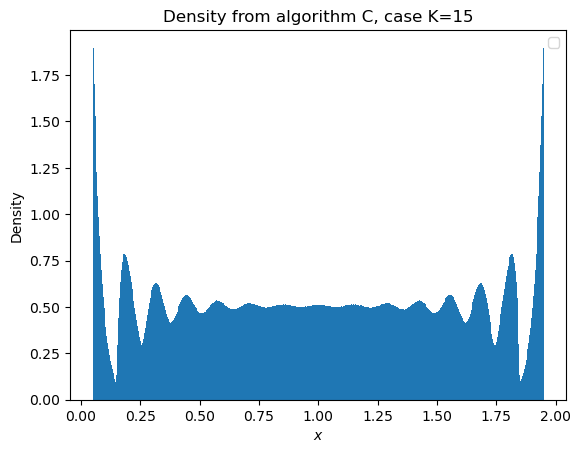

In [95]:
plt.hist(samples_C, bins=500, density=True)
plt.xlabel(r'$x$')
plt.ylabel('Density')
plt.legend()
plt.title('Density from algorithm C, case K=15')
#plt.vlines(np.arange(R, L, 2*R),ymin=0, ymax=2, color='red')

plt.show()

Additional note: How can we interpret this result ? The large values at the boundaries are due to the same effect as described with 2 spheres. Increasing $x$ a little, there are less configures as the space to the left of the sphere is not large enough to fit another sphere, so the total space to put the other sphere diminishes. Increasing $x$ a bit more (around $x\approx 3R$), there is again a peak. This is the case where we have two spheres close to the left border and close to each other, which has a similar effect as the boundary. This repeat for the following peaks. However, the effect is less prevalent as one advanced in $x$, as there is a trade-off between spheres being attracted to each other (so that the other spheres have more possible configurations), and spheres repealing each other (there can e.g. be less configurations with all spheres clustered together versus 2 seperate group of clustered spheres).